In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['figure.dpi'] = (150)
import seaborn as sns
import warnings
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from yellowbrick.features import rfecv
import ppscore as ps
%matplotlib inline

In [2]:

df = pd.read_csv(r"C:\Users\yashv\Desktop\deployment\co2_emissions (1) (1).csv",delimiter=';')
df


,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


# EDA

In [3]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


In [4]:
df.tail()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7384,VOLVO,XC90 T6 AWD,SUV - STANDARD,2.0,4,AS,Z,12.2,8.7,10.7,26,248


In [5]:
df.shape

(7385, 12)

In [6]:
df.columns

Index(['make', 'model', 'vehicle_class', 'engine_size', 'cylinders',
       'transmission', 'fuel_type', 'fuel_consumption_city',
       'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)',
       'fuel_consumption_comb(mpg)', 'co2_emissions'],
      dtype='object')

In [7]:
df.duplicated().sum()

1112

In [8]:
df[df.duplicated()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M,X,7.9,5.9,7.0,40,163


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(6273, 12)

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
engine_size,6273.0,3.163000,1.365294,0.9,2.0,3.0,3.7,8.4
cylinders,6273.0,5.620596,1.846424,3.0,4.0,6.0,6.0,16.0
fuel_consumption_city,6273.0,12.615591,3.550572,4.2,10.1,12.1,14.7,30.6
fuel_consumption_hwy,6273.0,9.073426,2.277893,4.0,7.5,8.7,10.3,20.6
fuel_consumption_comb(l/100km),6273.0,11.022111,2.945028,4.1,8.9,10.6,12.7,26.1
fuel_consumption_comb(mpg),6273.0,27.395026,7.225472,11.0,22.0,27.0,32.0,69.0
co2_emissions,6273.0,251.247250,59.235396,96.0,208.0,246.0,289.0,522.0


In [12]:
df.describe(include=object)

,make,model,vehicle_class,transmission,fuel_type
count,6273,6273,6273,6273,6273
unique,42,2053,16,5,5
top,FORD,F-150 FFV,SUV - SMALL,AS,X
freq,575,32,1004,2720,3030


### Observation:-

##### we can say in make many of the cars belong to FORD Company.
##### here my observation is in vehicle_class SUV-Small are more.
##### "AS" for 'Automatic with select shift' cars has more Transmission.
##### "X" for 'Regular gasoline' cars has more fule type

In [13]:
df.isna().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

#### In Dataset there are no Null values 

In [14]:
pp_feture = ps.matrix(df)
pp_feture

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,make,make,1.000000,predict_itself,True,None,0.00000,1.000000,None
1,make,model,0.010552,classification,True,weighted F1,0.00060,0.011146,DecisionTreeClassifier()
2,make,vehicle_class,0.245376,classification,True,weighted F1,0.10580,0.325216,DecisionTreeClassifier()
3,make,engine_size,0.231987,regression,True,mean absolute error,1.08338,0.832050,DecisionTreeRegressor()
4,make,cylinders,0.275864,regression,True,mean absolute error,1.45800,1.055791,DecisionTreeRegressor()
...,...,...,...,...,...,...,...,...,...
139,co2_emissions,fuel_consumption_city,0.729084,regression,True,mean absolute error,2.72118,0.737210,DecisionTreeRegressor()
140,co2_emissions,fuel_consumption_hwy,0.642173,regression,True,mean absolute error,1.71720,0.614461,DecisionTreeRegressor()
141,co2_emissions,fuel_consumption_comb(l/100km),0.766130,regression,True,mean absolute error,2.25166,0.526596,DecisionTreeRegressor()
142,co2_emissions,fuel_consumption_comb(mpg),0.829654,regression,True,mean absolute error,5.51720,0.939832,DecisionTreeRegressor()


In [15]:
pp_feture[pp_feture['y']== 'co2_emissions']

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
11,make,co2_emissions,0.228771,regression,True,mean absolute error,46.8506,36.132553,DecisionTreeRegressor()
23,model,co2_emissions,0.564769,regression,True,mean absolute error,46.8506,20.390844,DecisionTreeRegressor()
35,vehicle_class,co2_emissions,0.245606,regression,True,mean absolute error,46.8506,35.343824,DecisionTreeRegressor()
47,engine_size,co2_emissions,0.551434,regression,True,mean absolute error,46.8506,21.015606,DecisionTreeRegressor()
59,cylinders,co2_emissions,0.478660,regression,True,mean absolute error,46.8506,24.425094,DecisionTreeRegressor()
71,transmission,co2_emissions,0.104141,regression,True,mean absolute error,46.8506,41.971544,DecisionTreeRegressor()
83,fuel_type,co2_emissions,0.018239,regression,True,mean absolute error,46.8506,45.996093,DecisionTreeRegressor()
95,fuel_consumption_city,co2_emissions,0.764331,regression,True,mean absolute error,46.8506,11.041229,DecisionTreeRegressor()
107,fuel_consumption_hwy,co2_emissions,0.687914,regression,True,mean absolute error,46.8506,14.621412,DecisionTreeRegressor()
119,fuel_consumption_comb(l/100km),co2_emissions,0.818192,regression,True,mean absolute error,46.8506,8.517829,DecisionTreeRegressor()


In [16]:
df.corr()

,engine_size,cylinders,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
engine_size,1.000000,0.928796,0.834325,0.766700,0.820183,-0.764060,0.854999
cylinders,0.928796,1.000000,0.801180,0.717321,0.780932,-0.724347,0.834697
fuel_consumption_city,0.834325,0.801180,1.000000,0.950733,0.994040,-0.927901,0.918528
fuel_consumption_hwy,0.766700,0.717321,0.950733,1.000000,0.978578,-0.892238,0.883153
fuel_consumption_comb(l/100km),0.820183,0.780932,0.994040,0.978578,1.000000,-0.926110,0.916611
fuel_consumption_comb(mpg),-0.764060,-0.724347,-0.927901,-0.892238,-0.926110,1.000000,-0.906839
co2_emissions,0.854999,0.834697,0.918528,0.883153,0.916611,-0.906839,1.000000


<Axes: >

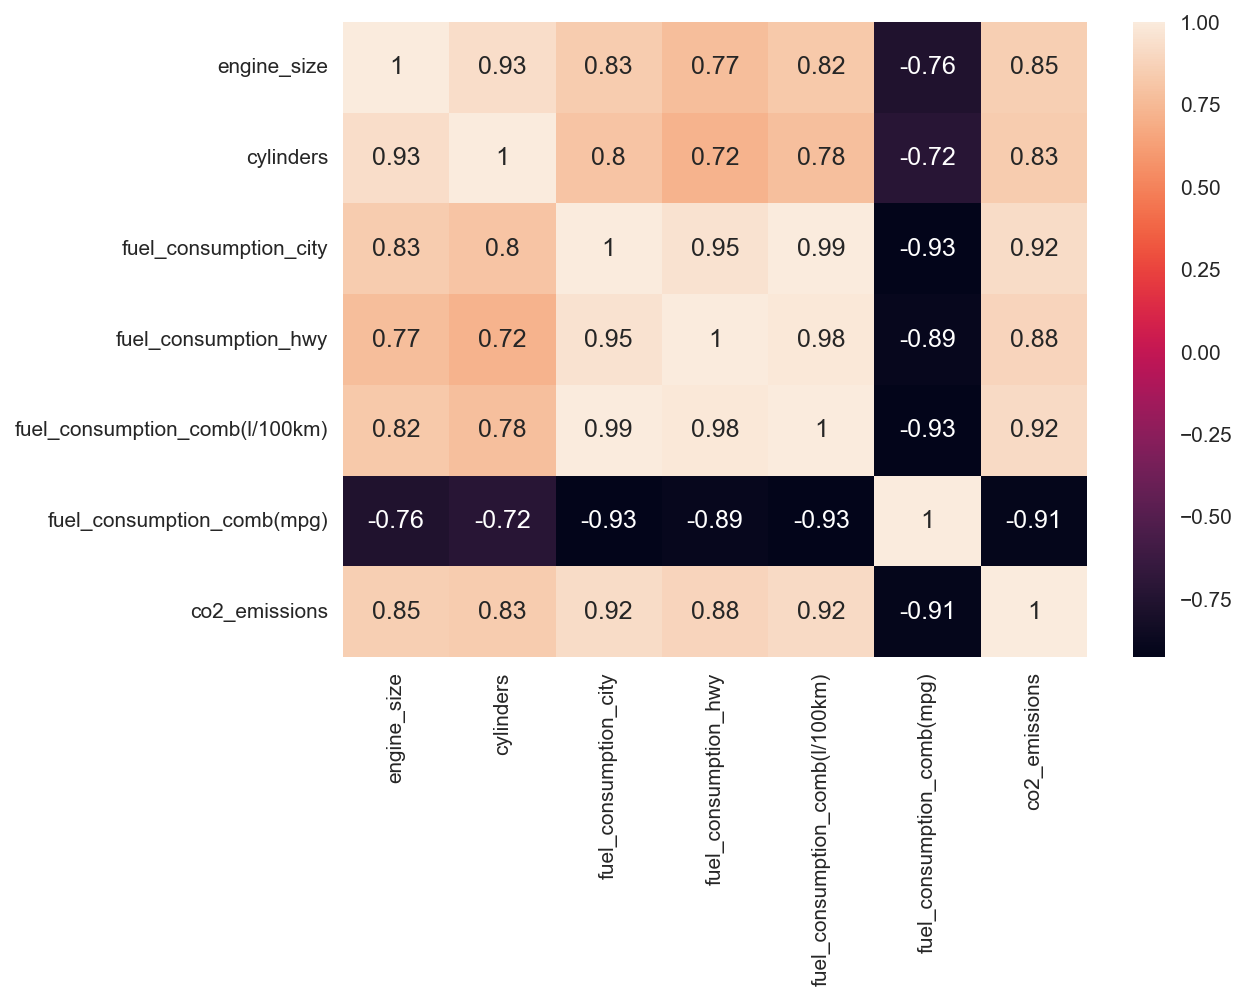

In [17]:
sns.heatmap(df.corr(),annot=True)

# Visualization 

In [18]:
df['make'].value_counts()

FORD             575
CHEVROLET        515
BMW              501
MERCEDES-BENZ    365
PORSCHE          296
GMC              289
TOYOTA           274
AUDI             263
NISSAN           213
MINI             200
JEEP             200
KIA              192
VOLKSWAGEN       187
HYUNDAI          184
DODGE            180
HONDA            159
CADILLAC         141
LEXUS            129
MAZDA            127
SUBARU           119
JAGUAR           118
VOLVO            118
BUICK             92
INFINITI          87
LINCOLN           81
LAND ROVER        76
MITSUBISHI        73
RAM               72
CHRYSLER          64
FIAT              56
MASERATI          52
ACURA             51
ROLLS-ROYCE       48
ASTON MARTIN      39
LAMBORGHINI       37
BENTLEY           35
SCION             21
ALFA ROMEO        19
GENESIS           14
SMART              7
SRT                2
BUGATTI            2
Name: make, dtype: int64

<Axes: xlabel='count', ylabel='make'>

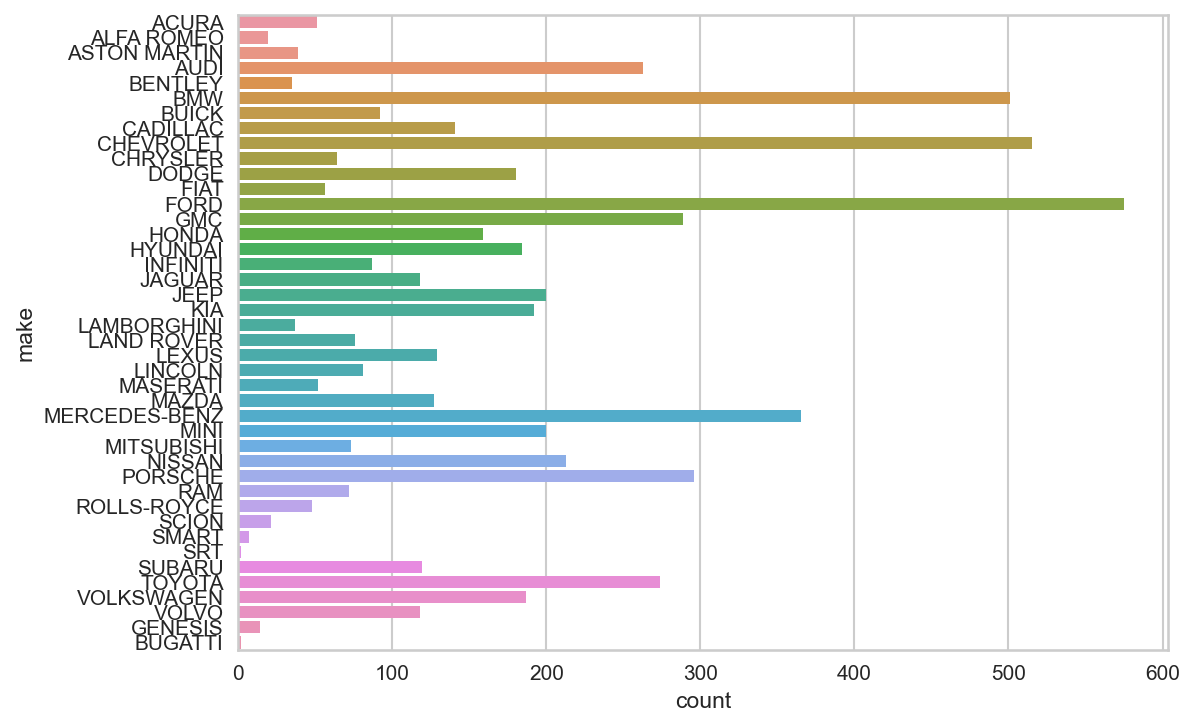

In [19]:
sns.countplot(data=df,y=df['make'])

In [20]:
 df['vehicle_class'].value_counts()

SUV - SMALL                 1004
MID-SIZE                     981
COMPACT                      902
SUV - STANDARD               613
SUBCOMPACT                   532
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      474
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        212
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: vehicle_class, dtype: int64

<Axes: xlabel='count', ylabel='vehicle_class'>

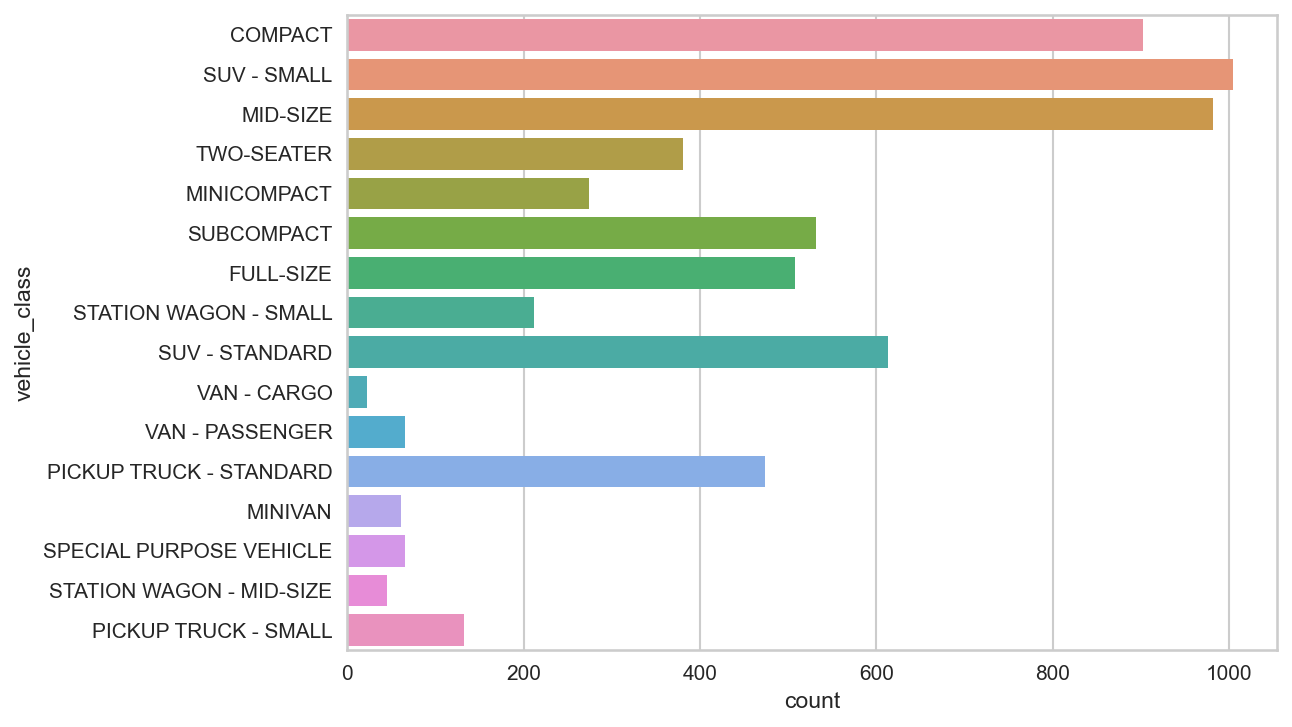

In [21]:
sns.countplot(data=df,y=df['vehicle_class'])

"A"  = 'Automatic',
"AM" ='Automated manual', 
"AS" = 'Automatic with select shift', 
"AV" = 'Continuously variable', 
"M"  = 'Manual'

In [22]:
x = df['transmission'].value_counts()

In [23]:
values = df['transmission'].unique()
values

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

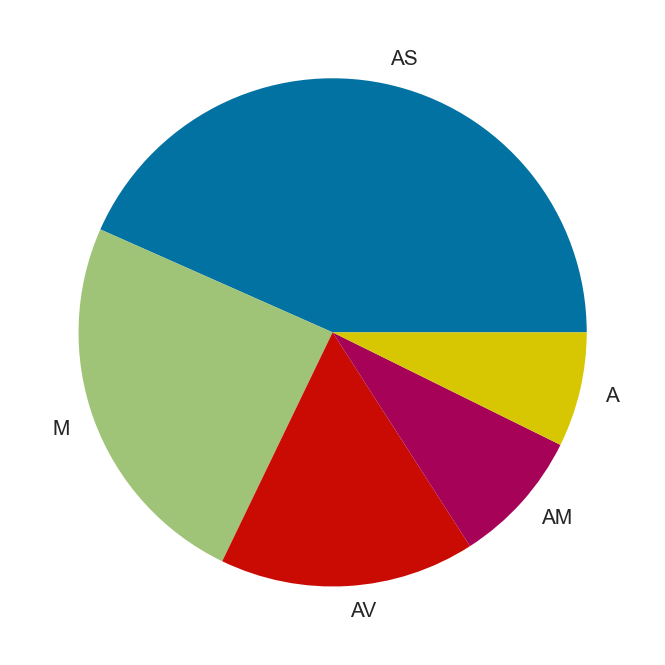

In [24]:
plt.pie(x,labels=values)
plt.show()
plt.rcParams['figure.figsize'] = (5,5)

### fuel_type:-

"X" ='Regular gasoline', 
  "Z" = 'Premium gasoline', 
  "D" = 'Diesel', 
  "E" = 'Ethanol (E85)', 
  "N" = 'Natural gas'

In [25]:
df['fuel_type'].value_counts()

X    3030
Z    2765
E     330
D     147
N       1
Name: fuel_type, dtype: int64

<Axes: xlabel='fuel_type', ylabel='count'>

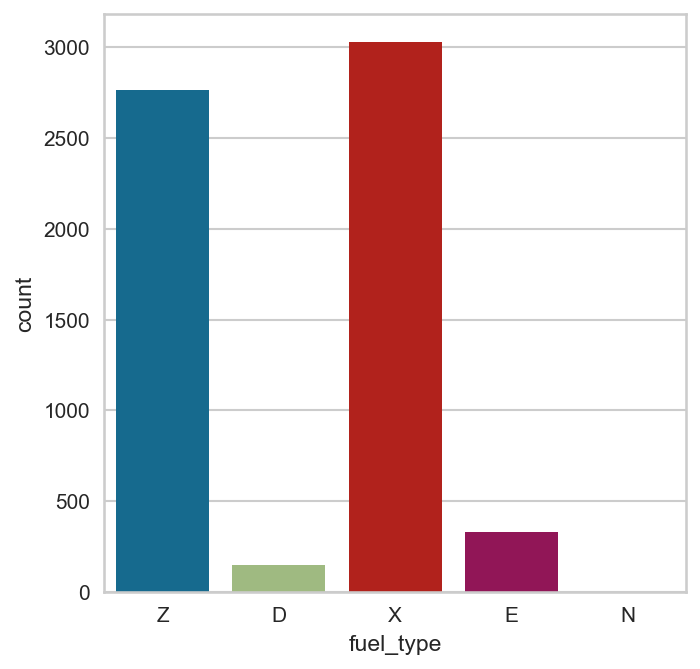

In [26]:
sns.countplot(data=df,x=df['fuel_type'])

In [27]:
df.head()

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244


Text(0.5, 1.0, 'Fuel_Consumption_Hwy')

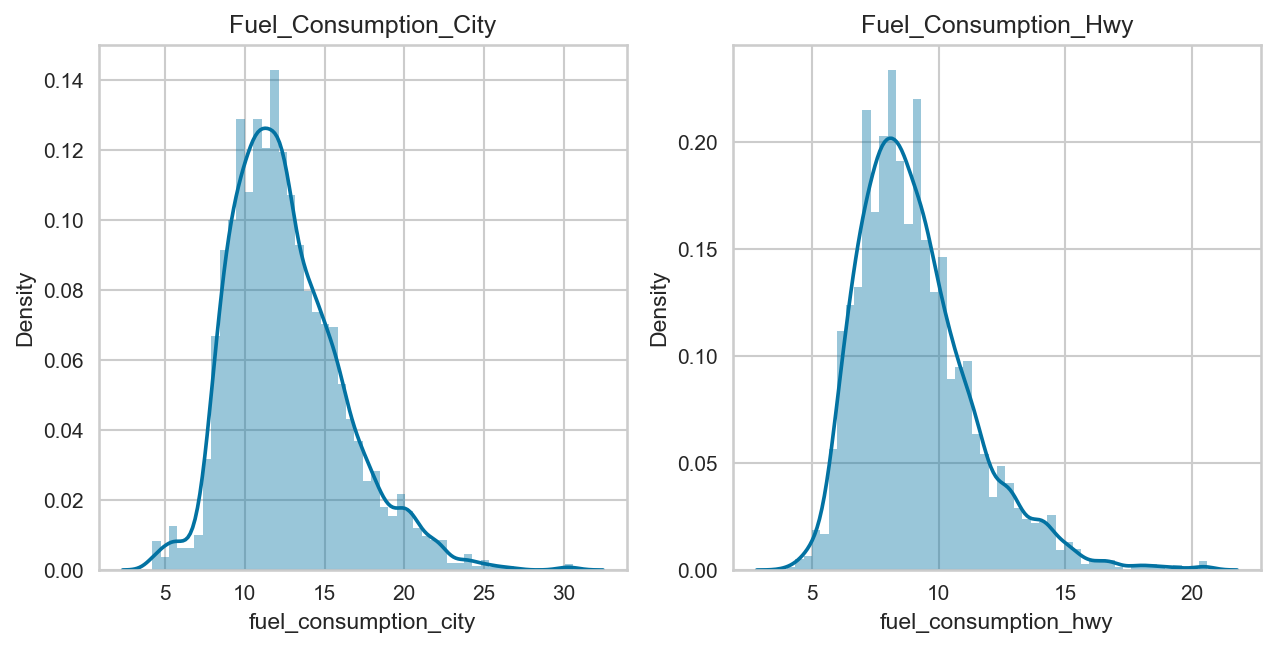

In [28]:
plt.rcParams['figure.figsize'] = (10,10)
plt.tight_layout()

plt.subplot(2,2,1)
sns.distplot(df['fuel_consumption_city'])
plt.title('Fuel_Consumption_City')

plt.subplot(2,2,2)
sns.distplot(df['fuel_consumption_hwy'])
plt.title('Fuel_Consumption_Hwy')



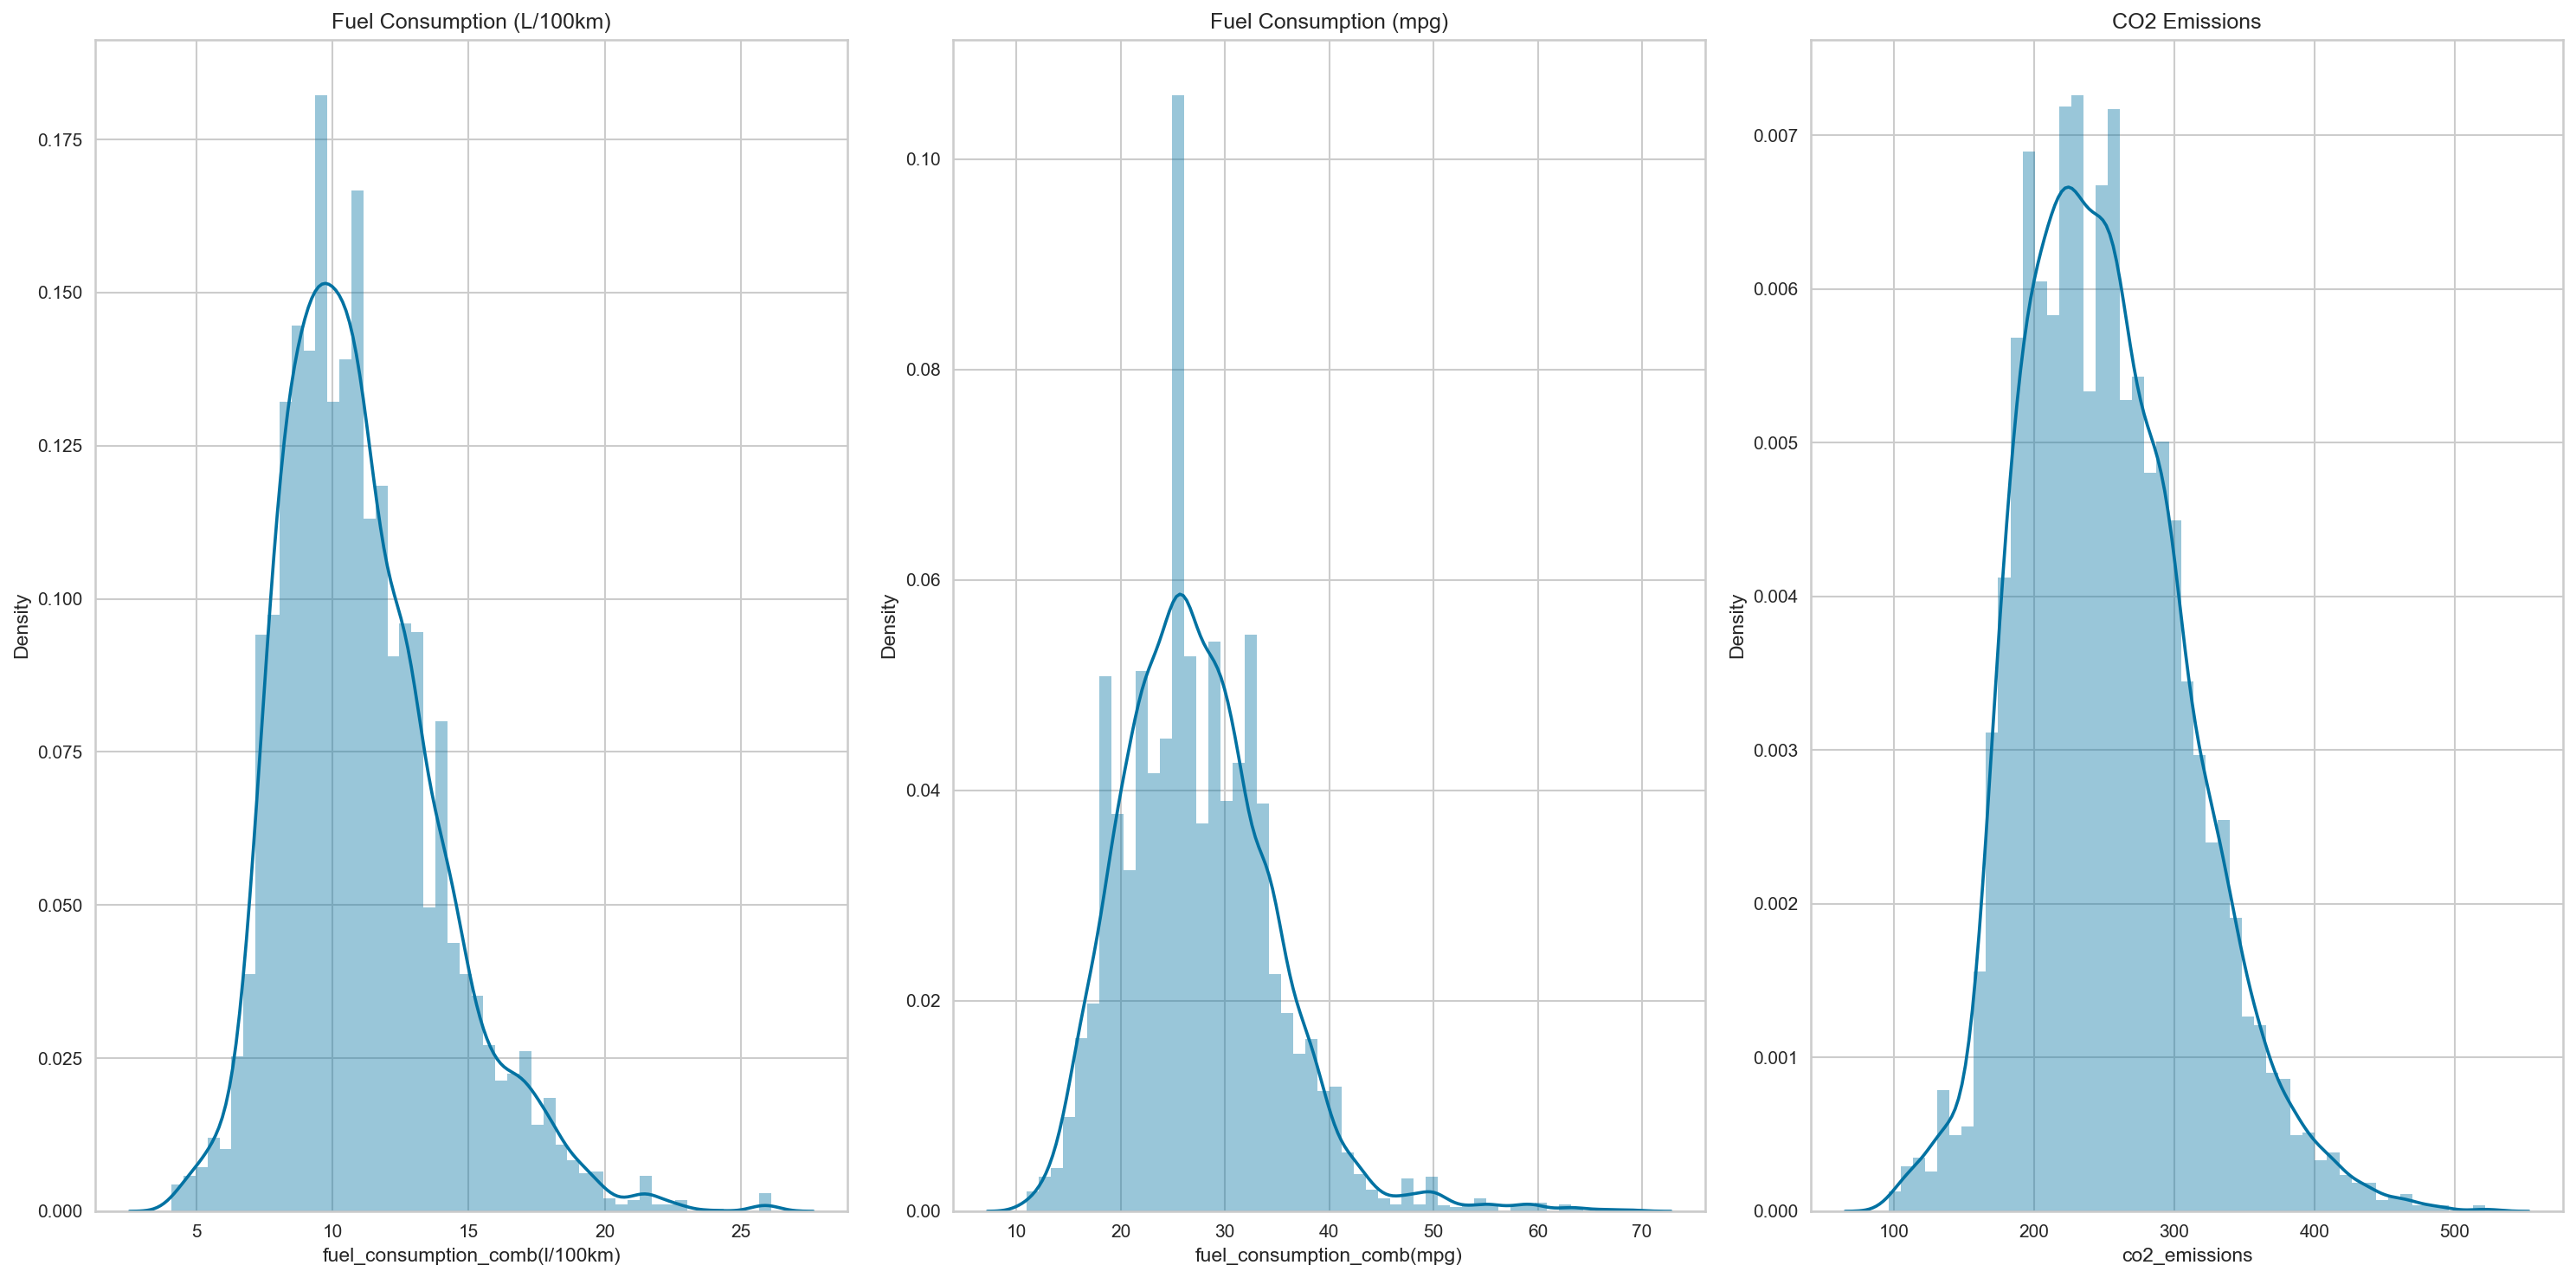

In [29]:
plt.figure(figsize=(20, 10))  


plt.subplot(1, 3, 1)
sns.distplot(df['fuel_consumption_comb(l/100km)'])
plt.title('Fuel Consumption (L/100km)')


plt.subplot(1, 3, 2)
sns.distplot(df['fuel_consumption_comb(mpg)'])
plt.title('Fuel Consumption (mpg)')


plt.subplot(1, 3, 3)
sns.distplot(df['co2_emissions'])
plt.title('CO2 Emissions')

plt.tight_layout()

# Feature Engineering

#### Create a new feature Make_Type by combining various car companies(Make) on the basis of their functionality
#### There are 42 unique Car Companies. We will divide these companies into Luxury, Sports, Premium and General cars

In [30]:
df['Make_Type'] = df['make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
df['Make_Type'] = df['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
df['Make_Type'] = df['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
df['Make_Type'] = df['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')

In [31]:
df.drop(['make'],inplace=True,axis=1)
df['Make_Type'].unique()

array(['Luxury', 'Premium', 'Sports', 'General'], dtype=object)

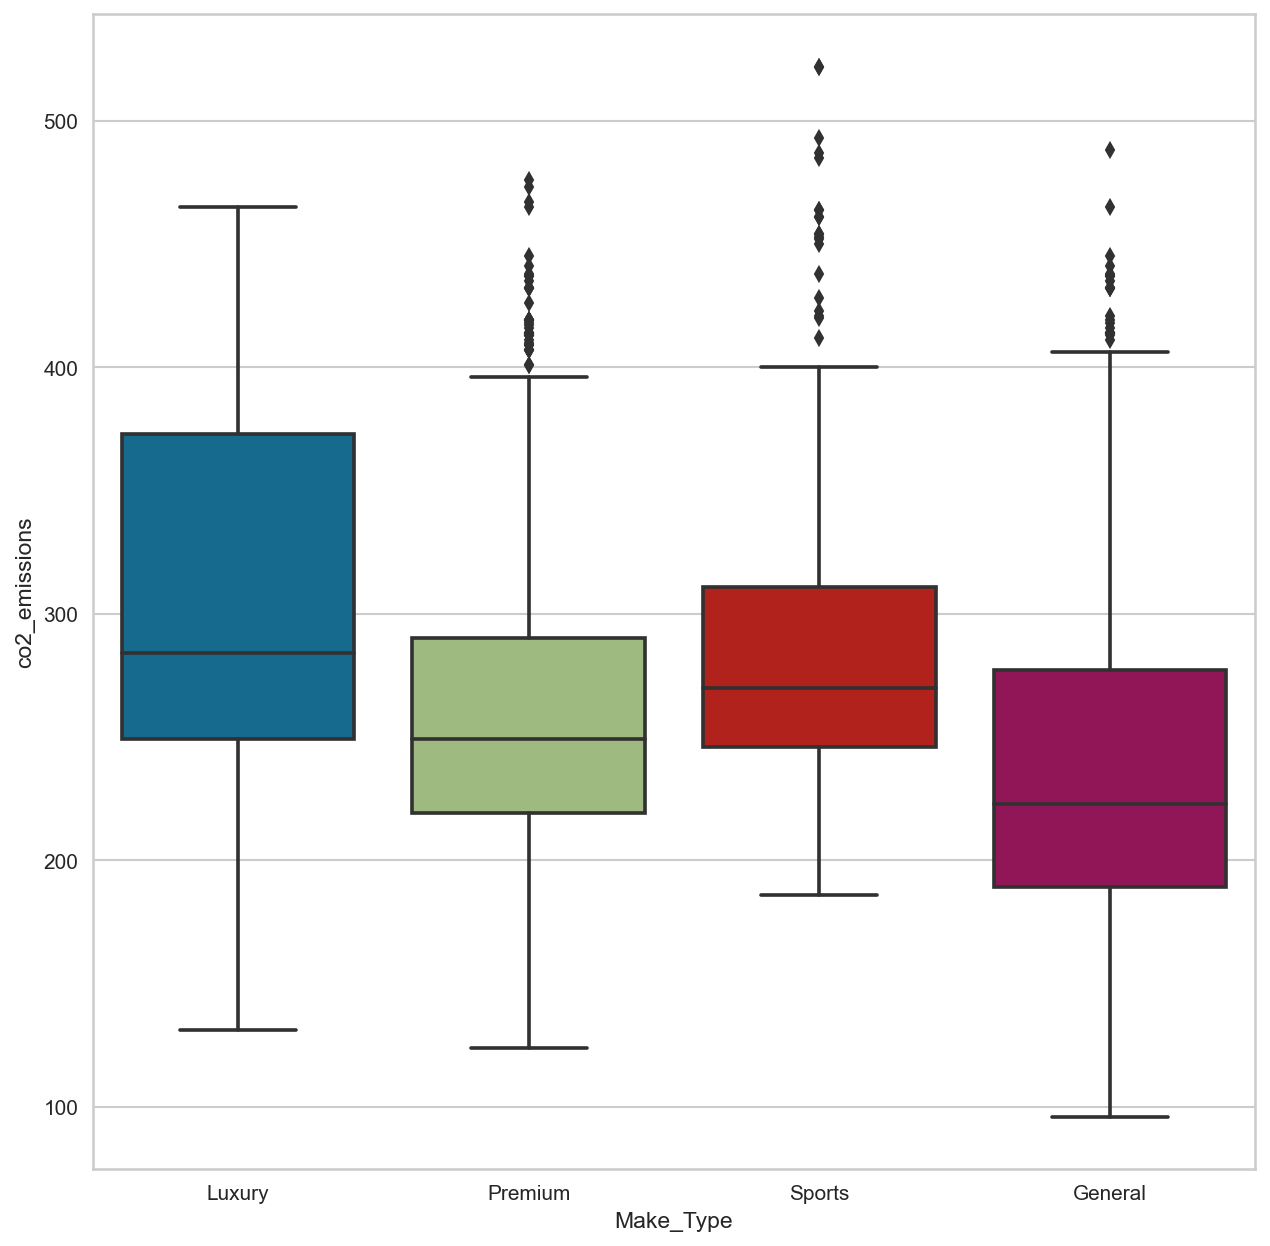

In [32]:
sns.boxplot(data=df,x=df['Make_Type'],y=df['co2_emissions'])
plt.rcParams['figure.figsize'] = (5,5)

#### Create a new feature Vehicle_Class_Type by combining various Vehicle_Class on the basis of their size
#### There are 16 unique Vehicle Classes. We will divide them into Hatchback, Sedan, SUV and Truck

In [33]:
df['Vehicle_Class_Type'] = df['vehicle_class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
df['Vehicle_Class_Type'] = df['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [34]:
df.drop(['vehicle_class'],inplace=True,axis=1)


In [35]:
df['Vehicle_Class_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'Truck'], dtype=object)

In [36]:
df['Vehicle_Class_Type'].value_counts()

Sedan        2127
Hatchback    1708
SUV          1678
Truck         760
Name: Vehicle_Class_Type, dtype: int64

In [37]:
df

,model,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Make_Type,Vehicle_Class_Type
0,ILX,2.0,4,AS,Z,9.9,6.7,8.5,33,196,Luxury,Hatchback
1,ILX,2.4,4,M,Z,11.2,7.7,9.6,29,221,Luxury,Hatchback
2,ILX HYBRID,1.5,4,AV,Z,6.0,5.8,5.9,48,136,Luxury,Hatchback
3,MDX 4WD,3.5,6,AS,Z,12.7,9.1,11.1,25,255,Luxury,SUV
4,RDX AWD,3.5,6,AS,Z,12.1,8.7,10.6,27,244,Luxury,SUV
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,XC40 T5 AWD,2.0,4,AS,Z,10.7,7.7,9.4,30,219,Premium,SUV
7381,XC60 T5 AWD,2.0,4,AS,Z,11.2,8.3,9.9,29,232,Premium,SUV
7382,XC60 T6 AWD,2.0,4,AS,Z,11.7,8.6,10.3,27,240,Premium,SUV
7383,XC90 T5 AWD,2.0,4,AS,Z,11.2,8.3,9.9,29,232,Premium,SUV


In [38]:
df.drop(['model'],inplace=True,axis=1)

In [39]:
df.head(4)

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Make_Type,Vehicle_Class_Type
0,2.0,4,AS,Z,9.9,6.7,8.5,33,196,Luxury,Hatchback
1,2.4,4,M,Z,11.2,7.7,9.6,29,221,Luxury,Hatchback
2,1.5,4,AV,Z,6.0,5.8,5.9,48,136,Luxury,Hatchback
3,3.5,6,AS,Z,12.7,9.1,11.1,25,255,Luxury,SUV


# Encoding Categorical Columns

In [40]:
object_col = df.select_dtypes(object).columns

In [41]:
object_col

Index(['transmission', 'fuel_type', 'Make_Type', 'Vehicle_Class_Type'], dtype='object')

In [42]:
df.head(5)

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Make_Type,Vehicle_Class_Type
0,2.0,4,AS,Z,9.9,6.7,8.5,33,196,Luxury,Hatchback
1,2.4,4,M,Z,11.2,7.7,9.6,29,221,Luxury,Hatchback
2,1.5,4,AV,Z,6.0,5.8,5.9,48,136,Luxury,Hatchback
3,3.5,6,AS,Z,12.7,9.1,11.1,25,255,Luxury,SUV
4,3.5,6,AS,Z,12.1,8.7,10.6,27,244,Luxury,SUV


In [43]:
oe = OrdinalEncoder()

In [44]:
df[object_col] = oe.fit_transform(df[object_col])

In [45]:
df

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Make_Type,Vehicle_Class_Type
0,2.0,4,2.0,4.0,9.9,6.7,8.5,33,196,1.0,0.0
1,2.4,4,4.0,4.0,11.2,7.7,9.6,29,221,1.0,0.0
2,1.5,4,3.0,4.0,6.0,5.8,5.9,48,136,1.0,0.0
3,3.5,6,2.0,4.0,12.7,9.1,11.1,25,255,1.0,1.0
4,3.5,6,2.0,4.0,12.1,8.7,10.6,27,244,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,2.0,4.0,10.7,7.7,9.4,30,219,2.0,1.0
7381,2.0,4,2.0,4.0,11.2,8.3,9.9,29,232,2.0,1.0
7382,2.0,4,2.0,4.0,11.7,8.6,10.3,27,240,2.0,1.0
7383,2.0,4,2.0,4.0,11.2,8.3,9.9,29,232,2.0,1.0


In [46]:
sc = StandardScaler()

In [47]:
x = sc.fit_transform(df)
x

array([[-0.85189918, -0.87776438,  0.13422903, ..., -0.93274727,
        -0.15391223, -1.30882605],
       [-0.55889864, -0.87776438,  1.64322308, ..., -0.51066867,
        -0.15391223, -1.30882605],
       [-1.21814985, -0.87776438,  0.88872605, ..., -1.9457359 ,
        -0.15391223, -1.30882605],
       ...,
       [-0.85189918, -0.87776438,  0.13422903, ..., -0.18988894,
         0.7603789 , -0.30903723],
       [-0.85189918, -0.87776438,  0.13422903, ..., -0.32495409,
         0.7603789 , -0.30903723],
       [-0.85189918, -0.87776438,  0.13422903, ..., -0.05482379,
         0.7603789 , -0.30903723]])

In [48]:
db = DBSCAN()

y = db.fit_predict(x)

In [49]:
y

array([-1, -1, -1, ..., 11, 11, 11], dtype=int64)

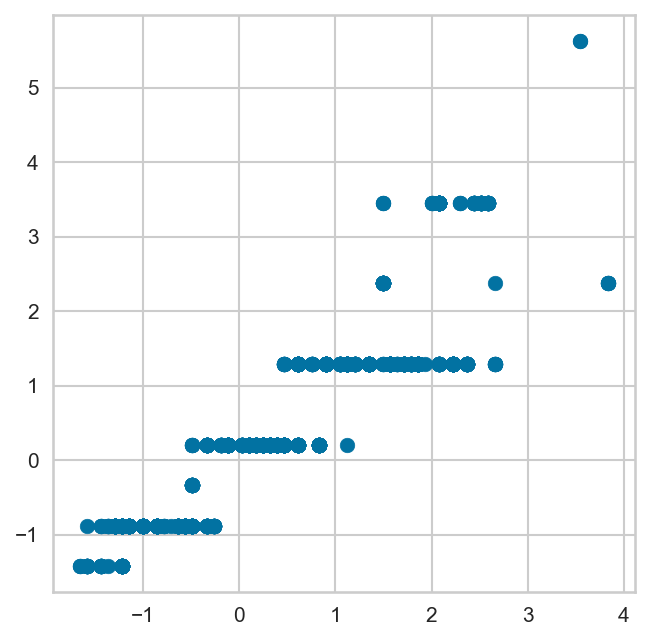

In [50]:
plt.scatter(x[:,0],x[:,1],cmap='viridis')

In [51]:
silhouette_score(x,y)

0.2971488834131248

In [52]:
neigh = NearestNeighbors(n_neighbors=3).fit(x)
d,i = neigh.kneighbors(x)

In [53]:
pd.DataFrame(d)

,0,1,2
0,0.0,0.184579,0.673937
1,0.0,0.200035,0.271191
2,0.0,0.321171,1.500501
3,0.0,0.000000,0.016883
4,0.0,0.191061,0.194197
...,...,...,...
6268,0.0,0.067029,0.100017
6269,0.0,0.000000,0.054826
6270,0.0,0.028167,0.055558
6271,0.0,0.000000,0.054826


In [54]:
d

array([[0.        , 0.18457932, 0.6739373 ],
       [0.        , 0.20003472, 0.27119092],
       [0.        , 0.32117093, 1.50050062],
       ...,
       [0.        , 0.02816672, 0.05555797],
       [0.        , 0.        , 0.05482647],
       [0.        , 0.09820222, 0.17323745]])

In [55]:
dist = np.sort(d[:,1])

Text(0, 0.5, 'Epsilion value')

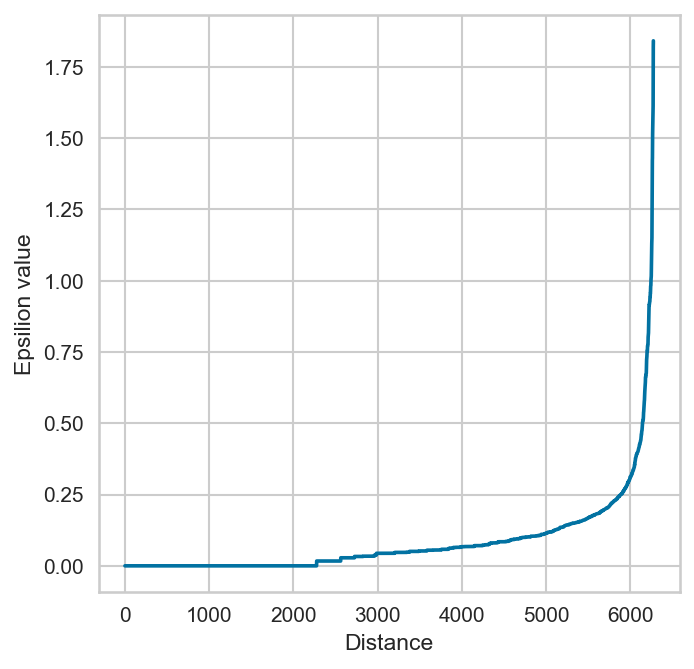

In [56]:
plt.plot(dist)
plt.xlabel('Distance')
plt.ylabel('Epsilion value')

In [57]:
db = DBSCAN(eps=0.35,min_samples=3)

y = db.fit_predict(x)

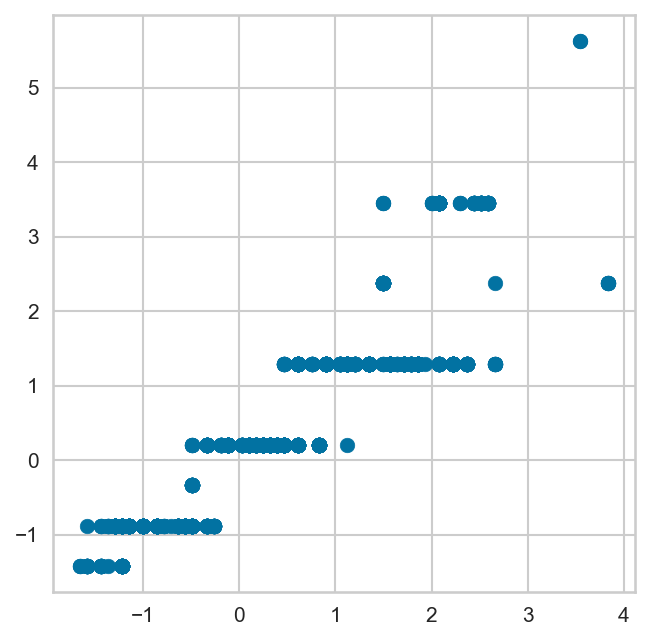

In [58]:
plt.scatter(x[:,0],x[:,1],cmap='viridis')

In [59]:
silhouette_score(x,y)

0.34125668767989087

In [60]:
df['cluster'] = y

In [61]:
df

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Make_Type,Vehicle_Class_Type,cluster
0,2.0,4,2.0,4.0,9.9,6.7,8.5,33,196,1.0,0.0,-1
1,2.4,4,4.0,4.0,11.2,7.7,9.6,29,221,1.0,0.0,0
2,1.5,4,3.0,4.0,6.0,5.8,5.9,48,136,1.0,0.0,-1
3,3.5,6,2.0,4.0,12.7,9.1,11.1,25,255,1.0,1.0,1
4,3.5,6,2.0,4.0,12.1,8.7,10.6,27,244,1.0,1.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,2.0,4,2.0,4.0,10.7,7.7,9.4,30,219,2.0,1.0,17
7381,2.0,4,2.0,4.0,11.2,8.3,9.9,29,232,2.0,1.0,17
7382,2.0,4,2.0,4.0,11.7,8.6,10.3,27,240,2.0,1.0,17
7383,2.0,4,2.0,4.0,11.2,8.3,9.9,29,232,2.0,1.0,17


In [62]:
df['cluster'].nunique()

435

In [63]:
x = df.drop(['co2_emissions'],axis=1)
y = df['co2_emissions']

In [64]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)

# Linear Regression

In [65]:
lr = LinearRegression()

lr.fit(xtrain,ytrain)

ypred = lr.predict(xtest)

In [66]:
lr.coef_

array([ 4.33530236,  5.8824127 , -0.38043835,  9.01133941,  5.02412725,
        7.16252232, -3.7065121 , -2.81568538, -1.87406504,  1.93741046,
        0.01085953])

In [67]:
df.columns

Index(['engine_size', 'cylinders', 'transmission', 'fuel_type',
       'fuel_consumption_city', 'fuel_consumption_hwy',
       'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)',
       'co2_emissions', 'Make_Type', 'Vehicle_Class_Type', 'cluster'],
      dtype='object')

In [68]:
lr.score(xtrain,ytrain), lr.score(xtest,ytest)

(0.9174477197585323, 0.9045520181295478)

# SVR

In [69]:
from sklearn.svm import SVR

In [70]:
svr = SVR()

svr.fit(xtrain,ytrain)

ypred = svr.predict(xtest)

In [71]:
svr.score(xtrain,ytrain), svr.score(xtest,ytest)

(0.331191047417132, 0.3218694853167152)

# DecisionTreeRegressor

In [88]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
ypred_dtr = dtr.predict(xtest)

In [91]:
dtr.score(xtrain,ytrain),dtr.score(xtest,ytest)

(0.9996549621729504, 0.996568332981741)

# Ensemble Tech

In [85]:
! pip install xgboost

                                              0.0/99.7 MB ? eta -:--:--
                                              0.0/99.7 MB ? eta -:--:--
                                             0.0/99.7 MB 326.8 kB/s eta 0:05:06
                                              0.1/99.7 MB 1.1 MB/s eta 0:01:32
                                              0.1/99.7 MB 1.1 MB/s eta 0:01:32
                                             0.2/99.7 MB 807.1 kB/s eta 0:02:04
                                             0.2/99.7 MB 807.1 kB/s eta 0:02:04
                                             0.2/99.7 MB 724.0 kB/s eta 0:02:18
                                             0.2/99.7 MB 724.0 kB/s eta 0:02:18
                                             0.3/99.7 MB 731.4 kB/s eta 0:02:16
                                             0.3/99.7 MB 731.4 kB/s eta 0:02:16
                                             0.3/99.7 MB 731.4 kB/s eta 0:02:16
                                             0.4/99.7 MB 6

In [86]:
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,StackingRegressor,VotingRegressor

In [92]:
# bagging with RandomForest
bg_rf = BaggingRegressor(RandomForestRegressor(),n_estimators=10)
bg_rf.fit(xtrain,ytrain)
print(f"Traning Accuracy:{bg_rf.score(xtrain,ytrain)}\nTest Accuracy:{bg_rf.score(xtest,ytest)}")

Traning Accuracy:0.9982832961324936
Test Accuracy:0.9960045367568559


# Deployment Part

In [212]:
import joblib
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
plt.rcParams['figure.figsize'] = (15,10)
plt.rcParams['figure.dpi'] = (150)
import seaborn as sns
import warnings
from category_encoders import TargetEncoder
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder,StandardScaler
warnings.filterwarnings('ignore')
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.model_selection import train_test_split,GridSearchCV
from yellowbrick.features import rfecv
import ppscore as ps
from xgboost import XGBRegressor
from sklearn.ensemble import BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor,StackingRegressor,VotingRegressor
%matplotlib inline

In [213]:
dff = pd.read_csv(r"C:\Users\yashv\Desktop\deployment\co2_emissions (1) (1).csv",delimiter=';')
dff

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [214]:
dff.drop_duplicates(inplace=True)

In [215]:
dff['Make_Type'] = dff['make'].replace(['BUGATTI', 'PORSCHE', 'MASERATI', 'ASTON MARTIN', 'LAMBORGHINI', 'JAGUAR','SRT'], 'Sports')
dff['Make_Type'] = dff['Make_Type'].replace(['ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC', 'CHRYSLER', 'DODGE', 'GMC','INFINITI', 'JEEP', 'LAND ROVER', 'LEXUS', 'MERCEDES-BENZ','MINI', 'SMART', 'VOLVO'],'Premium')
dff['Make_Type'] = dff['Make_Type'].replace(['ACURA', 'BENTLEY', 'LINCOLN', 'ROLLS-ROYCE',  'GENESIS'], 'Luxury')
dff['Make_Type'] = dff['Make_Type'].replace(['CHEVROLET', 'FIAT', 'FORD', 'KIA', 'HONDA', 'HYUNDAI', 'MAZDA', 'MITSUBISHI','NISSAN', 'RAM', 'SCION', 'SUBARU', 'TOYOTA','VOLKSWAGEN'],'General')

In [216]:
dff.drop(['make'],inplace=True,axis=1)


In [217]:
dff['Make_Type'].unique()

array(['Luxury', 'Premium', 'Sports', 'General'], dtype=object)

In [218]:
dff['Vehicle_Class_Type'] = dff['vehicle_class'].replace(['COMPACT', 'MINICOMPACT', 'SUBCOMPACT'], 'Hatchback')
dff['Vehicle_Class_Type'] = dff['Vehicle_Class_Type'].replace(['MID-SIZE', 'TWO-SEATER', 'FULL-SIZE', 'STATION WAGON - SMALL', 'STATION WAGON - MID-SIZE'],'Sedan')
dff['Vehicle_Class_Type'] = dff['Vehicle_Class_Type'].replace(['SUV - SMALL', 'SUV - STANDARD', 'MINIVAN'],  'SUV')
dff['Vehicle_Class_Type'] = dff['Vehicle_Class_Type'].replace(['VAN - CARGO', 'VAN - PASSENGER', 'PICKUP TRUCK - STANDARD', 'SPECIAL PURPOSE VEHICLE', 'PICKUP TRUCK - SMALL'], 'Truck')

In [219]:
dff.drop(['vehicle_class'],inplace=True,axis=1)

In [220]:
dff['Vehicle_Class_Type'].unique()

array(['Hatchback', 'SUV', 'Sedan', 'Truck'], dtype=object)

In [221]:
dff.drop(['model'],inplace=True,axis=1)

In [222]:
dff.head(4)

,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,Make_Type,Vehicle_Class_Type
0,2.0,4,AS,Z,9.9,6.7,8.5,33,196,Luxury,Hatchback
1,2.4,4,M,Z,11.2,7.7,9.6,29,221,Luxury,Hatchback
2,1.5,4,AV,Z,6.0,5.8,5.9,48,136,Luxury,Hatchback
3,3.5,6,AS,Z,12.7,9.1,11.1,25,255,Luxury,SUV


In [223]:
# List of numeric and categorical columns
numeric_columns = ['engine_size', 'cylinders', 'fuel_consumption_city', 'fuel_consumption_hwy', 'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)']
categorical_columns = ['transmission', 'fuel_type', 'Make_Type', 'Vehicle_Class_Type']

# Create separate transformers for numeric and categorical columns
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder())])

# Use ColumnTransformer to preprocess columns separately
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_columns),
        ('cat', categorical_transformer, categorical_columns)
    ],
    remainder='passthrough'
)

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor), ('model', BaggingRegressor())])

# Separate features (x) and target (y)
x = dff.drop(columns=['co2_emissions'])
y = dff['co2_emissions']

# Split the data into training and testing sets
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=1)

# Fit the model
model.fit(xtrain, ytrain)

# Make predictions
ypred = model.predict(xtest)

# Save the model to a file
with open('model_Co2_1.pkl', 'wb') as model_file:
    pickle.dump(model, model_file)

In [205]:
dff.columns

Index(['engine_size', 'cylinders', 'transmission', 'fuel_type',
       'fuel_consumption_city', 'fuel_consumption_hwy',
       'fuel_consumption_comb(l/100km)', 'fuel_consumption_comb(mpg)',
       'co2_emissions', 'Make_Type', 'Vehicle_Class_Type'],
      dtype='object')

In [176]:
dff = pd.read_csv(r"C:\Users\yashv\Desktop\deployment\co2_emissions (1) (1).csv",delimiter=';')
dff

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,AS,Z,10.7,7.7,9.4,30,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,AS,Z,11.2,8.3,9.9,29,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,AS,Z,11.7,8.6,10.3,27,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,AS,Z,11.2,8.3,9.9,29,232


In [177]:
dff['transmission'].unique()

array(['AS', 'M', 'AV', 'AM', 'A'], dtype=object)

In [179]:
dff['fuel_type'].unique()

array(['Z', 'D', 'X', 'E', 'N'], dtype=object)

## Chi Squre feature selection

In [ ]:
#test = SelectKBest(score_func=chi2,k=6)
#test.fit(x,y)

In [ ]:
#test.scores_

In [ ]:
#col_lable1 = pd.DataFrame(test.scores_).T
#col_lable1.columns = x.columns

In [ ]:
#col_lable1

In [ ]:
#rfe = RFE(DecisionTreeRegressor())

In [ ]:
#rfe.fit(x,y)

In [ ]:
#rfe.ranking_

In [ ]:
#col_rfe = pd.DataFrame(rfe.ranking_).T
#col_rfe.columns = x.columns